<a href="https://colab.research.google.com/github/ikonushok/My_studying_Data-Science-and-Neyro-Nets-on-Python/blob/master/%D0%94%D0%97_9_Pro_%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8_%D0%BF%D0%BE%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PRO задание
Напишите “автокодировщик”, который будет из рукописных цифр MNIST генерировать из соответствующего изображения на CIFAR или Fashion Mnist, т.е. генерируйте из цифры MNIST - картинки CIFAR соответствующего класса

Сделайте такую же генерацию Fashion Mnist:
* Fashion Mnist успешно генерируется, а Cifar10 нет, на проверочной выборке получаются цветные образы, но не чистые изображения
* это не совсем автокодировщик, так как у автокодировщика вход строго равен выходу, но архитектура очень близкая к автокодировщику

## Подготовка данных

### Загрузка данных

In [ ]:
from tensorflow.keras.datasets import mnist, cifar10, fashion_mnist

import numpy as np
import random

# графика
import matplotlib.pyplot as plt # графики
from PIL import Image # изображжения
%matplotlib inline

In [ ]:
import os
os.chdir('/content/drive/My Drive/Занятие_9_Автокодировщики/data')

In [ ]:
(x_mnist, y_mnist), (x_test, y_test) = mnist.load_data()

arr_mnist = [] # Массив с индексами изображений каждого класса
for i in range(10):
  indexes = np.where(y_mnist==i)[0] # получили список из индексов положение класса i в y_train
  arr_mnist.append(indexes)

# Посмотрим число обьектов в каждом классе
for i in range(len(arr_mnist)): print(i, len(arr_mnist[i]))

0 5923
1 6742
2 5958
3 6131
4 5842
5 5421
6 5918
7 6265
8 5851
9 5949


In [ ]:
(x_f_mnist, y_f_mnist), (x_test, y_test) = fashion_mnist.load_data()

arr_f_mnist = [] # Массив с индексами изображений каждого класса
for i in range(10):
  indexes = np.where(y_f_mnist==i)[0] # получили список из индексов положение класса i в y_train
  arr_f_mnist.append(indexes)

# Посмотрим число обьектов в каждом классе
for i in range(len(arr_f_mnist)):
  print(i, len(arr_f_mnist[i]))

0 6000
1 6000
2 6000
3 6000
4 6000
5 6000
6 6000
7 6000
8 6000
9 6000


In [ ]:
(x_cifar10, y_cifar10), (x_test10, y_test10) = cifar10.load_data()

arr_cifar10 = [] # Массив с индексами изображений каждого класса
for i in range(10):
  indexes = np.where(y_cifar10==i)[0] # получили список из индексов положение класса i в y_train
  arr_cifar10.append(indexes)

# Посмотрим число обьектов в каждом классе
for i in range(len(arr_cifar10)):
  print(i, len(arr_cifar10[i]))

0 5000
1 5000
2 5000
3 5000
4 5000
5 5000
6 5000
7 5000
8 5000
9 5000


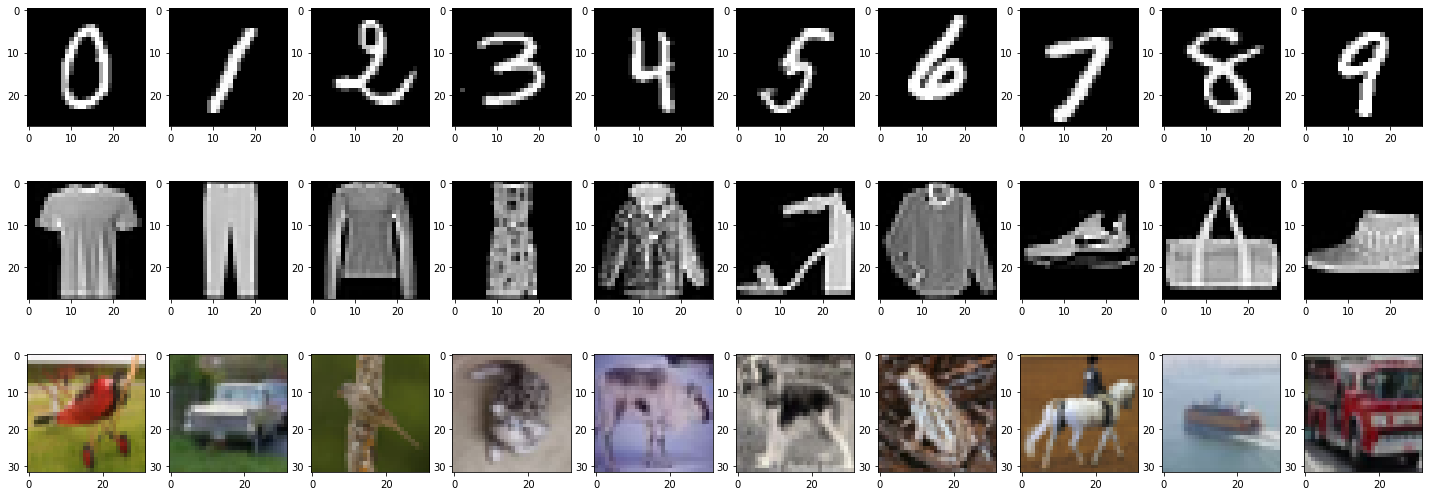


 (60000, 28, 28) 	:MNIST
 (60000, 28, 28) 	:Fahsion Mnist
 (50000, 32, 32, 3) 	:Cifar10


In [ ]:
# Выведем соответствующие друг другу обьекты
fig, axs = plt.subplots(3, 10, figsize=(25, 9))
for i in range(10):

  axs[0, i].imshow(Image.fromarray(x_mnist[random.choice(arr_mnist[i])]), cmap='gray') # отрисовка изображений
  axs[1, i].imshow(Image.fromarray(x_f_mnist[random.choice(arr_f_mnist[i])]), cmap='gray') # отрисовка изображений
  axs[2, i].imshow(Image.fromarray(x_cifar10[random.choice(arr_cifar10[i])]), cmap='gray') # отрисовка изображений

plt.show() # показываем изображения

print ('\n', x_mnist.shape, '\t:MNIST\n', x_f_mnist.shape, '\t:Fahsion Mnist\n', x_cifar10.shape, '\t:Cifar10')

### Функции графики и ошибок

In [ ]:
def getMSE(x1, x2): # создадим функцию среднеквадратичной ошибки
  x1 = x1.flatten() # сплющиваем в одномерный вектор
  x2 = x2.flatten() # сплющиваем в одномерный вектор
  delta = x1 - x2 # находим разницу
  return sum(delta ** 2) / len(delta) # и возвращаем сумму квадратов разницы, делённую на длину разницы

In [ ]:
# Функциz графики
def plotImages(X, Y, pred, shape=(28, 28)): # создадим функцию для вывода изображений как картинок
  n = 7  # количество картинок, которые хотим показать
  plt.figure(figsize=(16, 7)) # указываем размеры фигуры
  for i in range(n): # для каждой картинки из n(5)
      index = np.random.randint(0, pred.shape[0]) # startIndex - начиная с какого индекса хотим заплотить картинки
      # Показываем картинки из тестового набора
      ax = plt.subplot(3, n, i + 1) # выведем область рисования Axes
      plt.imshow(X[index].reshape(shape)) # отрисуем правильные картинки в размере 112*80      
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем зашумленные картинки
      ax = plt.subplot(3, n, i + 1 + n) # выведем область рисования Axes 
      plt.imshow(Y[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

      # Показываем восстановленные картинки
      ax = plt.subplot(3, n, i + 8 + n) # выведем область рисования Axes 
      plt.imshow(pred[index].reshape(shape)) # отрисуем обработанные сеткой картинки в размере 112*80     
      plt.gray() # выведем в черно-белом цвете
      ax.get_xaxis().set_visible(False) # скрываем вывод координатной оси x
      ax.get_yaxis().set_visible(False) # скрываем вывод координатной оси y

  plt.show()

## Fashion Mnist

In [ ]:
from tensorflow.keras.models import Model
# Из кераса загружаем необходимые слои для нейросети
from tensorflow.keras.layers import Dense, Flatten, Input, Reshape, Conv2DTranspose
from tensorflow.keras.layers import  UpSampling2D, MaxPooling2D, Conv2D, BatchNormalization
#from tensorflow.keras import backend as K # подтягиваем базовые керасовские функции
from tensorflow.keras.optimizers import Adam, Nadam, Adamax, RMSprop # загружаем выбранный оптимизатор
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

from tensorflow.keras import utils # загружаем утилиты кераса
from keras.utils import plot_model

import pandas as pd # библиотека для анализа и обработки данных
from sklearn.model_selection import train_test_split # модуль для разбивки выборки на тренировочную/тестовую

### Создание сети

In [ ]:
x_mnist = x_mnist.astype('float32')/255 # представляем в виде значений от 0 до 1
x_f_mnist = x_f_mnist.astype('float32')/255 # представляем в виде значений от 0 до 1
x_cifar10 = x_cifar10.astype('float32')/255 # представляем в виде значений от 0 до 1

In [ ]:
def baseAutoencoder_fM(shape=(28,28,1)): # зададим функцию создания базового автокодировщика
  img_input = Input((shape)) # задаём входные размеры
  k=4
  l=1

  e = Conv2D(32*k, (3, 3), activation='relu', padding='same')(img_input)
  e = Conv2D(64*k, (3, 3), activation='relu', padding='same')(e)
  e = Conv2D(128*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = Conv2D(128*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = BatchNormalization()(e)

  d = Conv2D(128*k*l, (3, 3), activation='relu', padding='same')(e)
  d = Conv2D(64*k, (3, 3), activation='relu', padding='same')(d)
  d = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2D(1, (3, 3), padding='same', activation='sigmoid')(d)

  model = Model(img_input, d)
  model.compile(optimizer=Adamax(lr=0.0001), loss='mse')

  return model # функция вернёт заданную модель

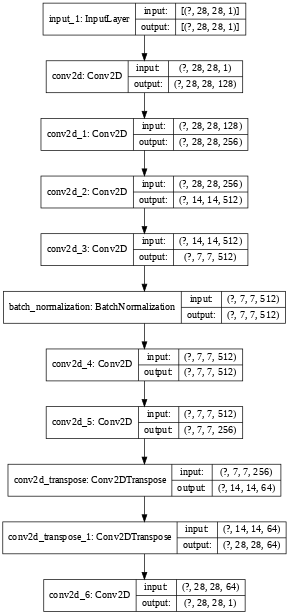

In [ ]:
model_fM = baseAutoencoder_fM() # создаем автокодировщик
plot_model(model_fM, dpi=50, show_shapes=True, show_layer_names=True)

### Обучение сети


Обучение для i = 0 

Epoch 1/15
125/125 [==============================] - 2s 18ms/step - loss: 0.0707 - val_loss: 0.1118
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0534 - val_loss: 0.0735
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0528 - val_loss: 0.0593
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0527 - val_loss: 0.0547
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0525 - val_loss: 0.0539
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0524 - val_loss: 0.0538
Epoch 7/15
125/125 [==============================] - ETA: 0s - loss: 0.0524
Epoch 00007: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
125/125 [==============================] - 2s 16ms/step - loss: 0.0524 - val_loss: 0.0546
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0523 - val_loss: 0.0538
Epoch 9/15
125/125 [====

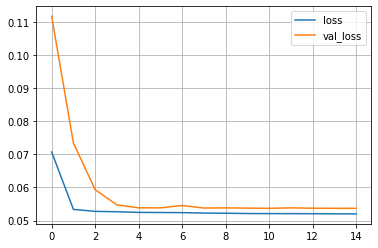

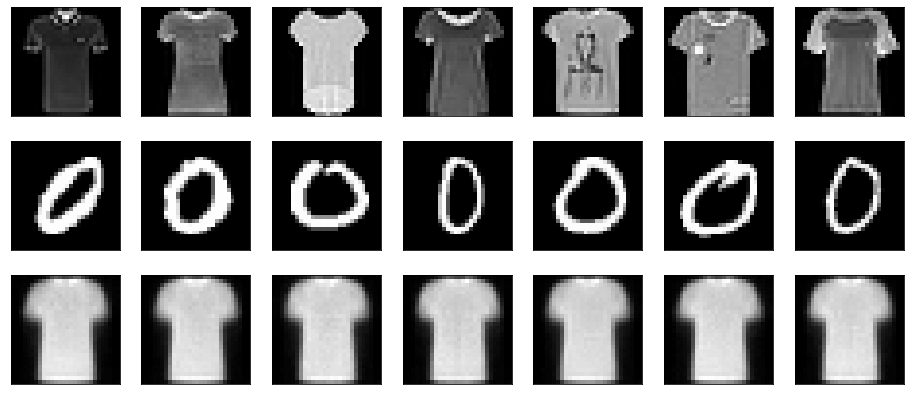

Средняя ошибка на Fashion Mnist: 0.1168
Минимальная ошибка на Fashion Mnist: 0.0121
Обьекты распознаны, как Fashion Mnist: 10.0%

Обучение для i = 1 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0548 - val_loss: 0.0404
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0391 - val_loss: 0.0362
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0366 - val_loss: 0.0347
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0356 - val_loss: 0.0339
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0350 - val_loss: 0.0334
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0347 - val_loss: 0.0331
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0344 - val_loss: 0.0329
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0342 - val_loss: 0.0327
Epoch 9/15
125/125 [=====================

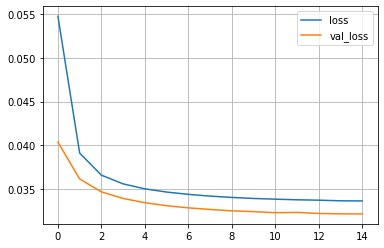

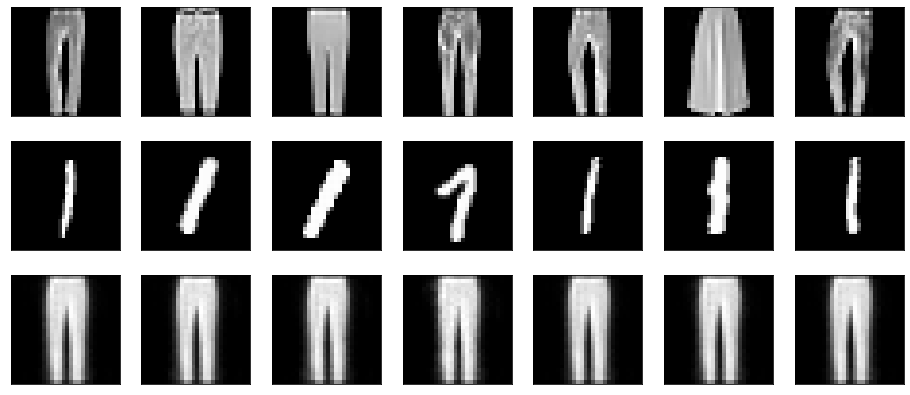

Средняя ошибка на Fashion Mnist: 0.1355
Минимальная ошибка на Fashion Mnist: 0.0112
Обьекты распознаны, как Fashion Mnist: 13.0%

Обучение для i = 2 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.1215 - val_loss: 0.0931
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0845 - val_loss: 0.0747
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0720 - val_loss: 0.0682
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0682 - val_loss: 0.0655
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0663 - val_loss: 0.0639
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0651 - val_loss: 0.0630
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0643 - val_loss: 0.0624
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0637 - val_loss: 0.0619
Epoch 9/15
125/125 [=====================

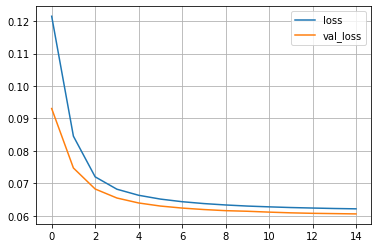

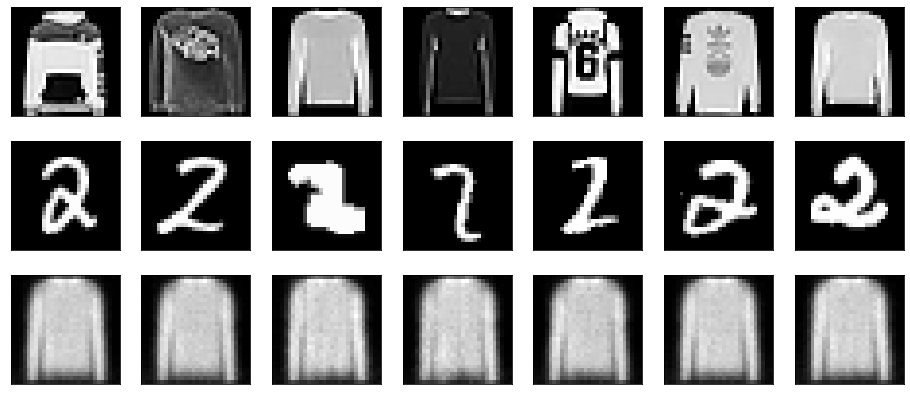

Средняя ошибка на Fashion Mnist: 0.1133
Минимальная ошибка на Fashion Mnist: 0.0185
Обьекты распознаны, как Fashion Mnist: 9.0%

Обучение для i = 3 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0728 - val_loss: 0.0533
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0508 - val_loss: 0.0489
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0488 - val_loss: 0.0476
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0479 - val_loss: 0.0470
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0474 - val_loss: 0.0467
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0471 - val_loss: 0.0463
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0468 - val_loss: 0.0462
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0467 - val_loss: 0.0461
Epoch 9/15
125/125 [======================

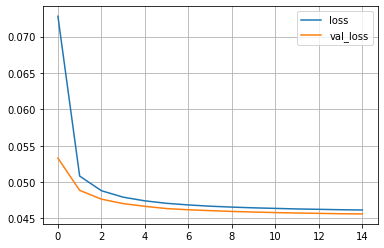

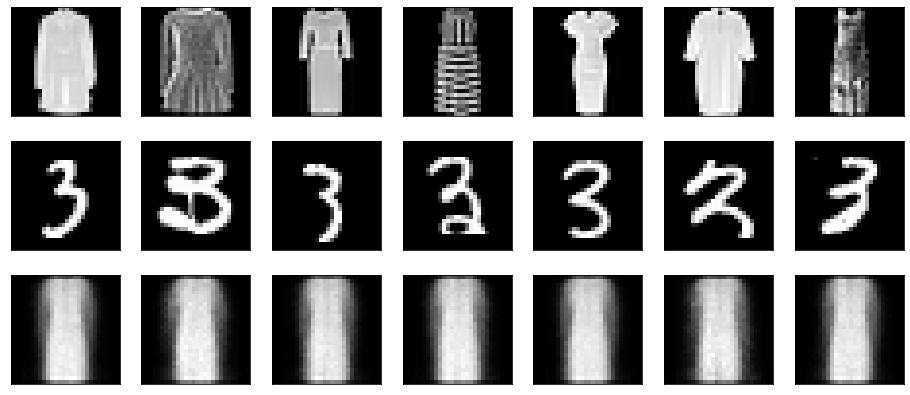

Средняя ошибка на Fashion Mnist: 0.1167
Минимальная ошибка на Fashion Mnist: 0.0165
Обьекты распознаны, как Fashion Mnist: 15.0%

Обучение для i = 4 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0884 - val_loss: 0.0724
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0650 - val_loss: 0.0631
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0614 - val_loss: 0.0604
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0596 - val_loss: 0.0589
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0585 - val_loss: 0.0579
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0578 - val_loss: 0.0573
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0572 - val_loss: 0.0568
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0569 - val_loss: 0.0565
Epoch 9/15
125/125 [=====================

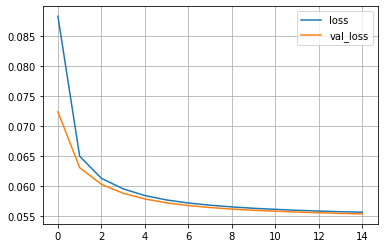

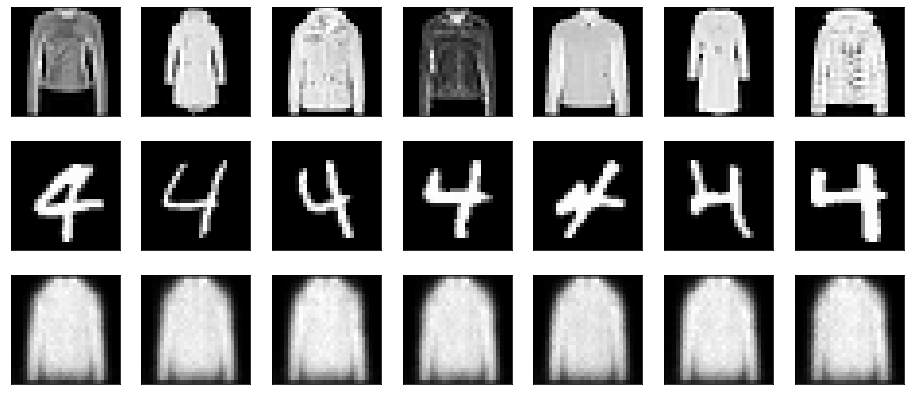

Средняя ошибка на Fashion Mnist: 0.1176
Минимальная ошибка на Fashion Mnist: 0.0178
Обьекты распознаны, как Fashion Mnist: 10.0%

Обучение для i = 5 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.1520 - val_loss: 0.1159
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0994 - val_loss: 0.0754
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0727 - val_loss: 0.0683
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0654 - val_loss: 0.0640
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0613 - val_loss: 0.0608
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0587 - val_loss: 0.0586
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0571 - val_loss: 0.0573
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0560 - val_loss: 0.0563
Epoch 9/15
125/125 [=====================

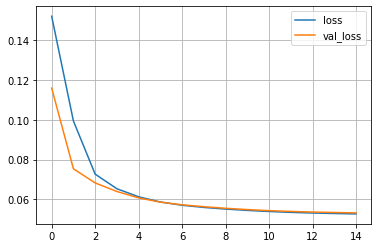

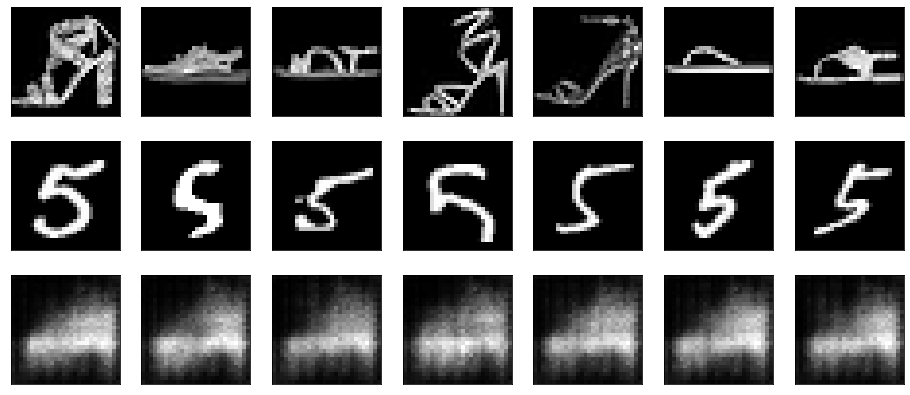

Средняя ошибка на Fashion Mnist: 0.1307
Минимальная ошибка на Fashion Mnist: 0.0122
Обьекты распознаны, как Fashion Mnist: 19.0%

Обучение для i = 6 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.1182 - val_loss: 0.0856
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0820 - val_loss: 0.0716
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0707 - val_loss: 0.0670
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0668 - val_loss: 0.0651
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0653 - val_loss: 0.0642
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0645 - val_loss: 0.0636
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0641 - val_loss: 0.0632
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0638 - val_loss: 0.0630
Epoch 9/15
125/125 [=====================

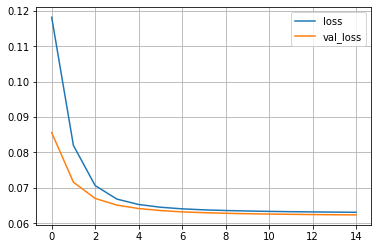

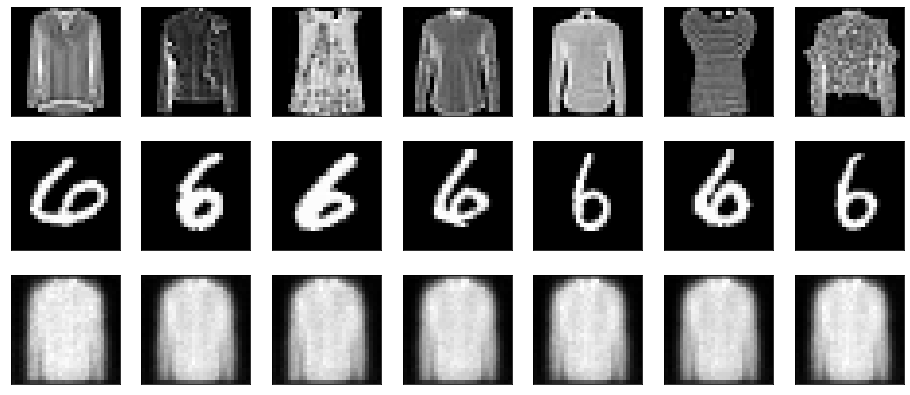

Средняя ошибка на Fashion Mnist: 0.0992
Минимальная ошибка на Fashion Mnist: 0.0138
Обьекты распознаны, как Fashion Mnist: 11.0%

Обучение для i = 7 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.1021 - val_loss: 0.0667
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0595 - val_loss: 0.0518
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0481 - val_loss: 0.0455
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0437 - val_loss: 0.0425
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0412 - val_loss: 0.0405
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0394 - val_loss: 0.0391
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0381 - val_loss: 0.0380
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0371 - val_loss: 0.0372
Epoch 9/15
125/125 [=====================

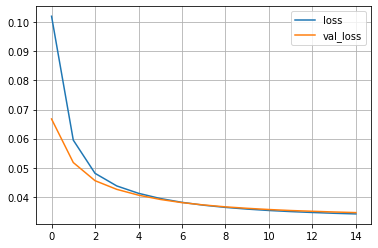

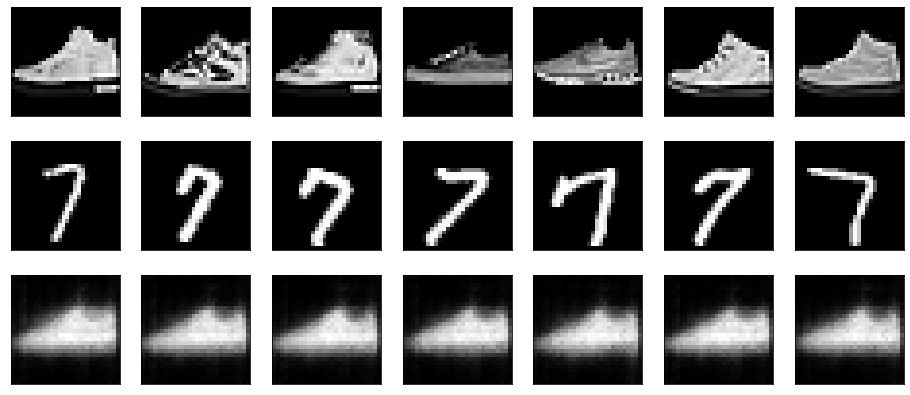

Средняя ошибка на Fashion Mnist: 0.1346
Минимальная ошибка на Fashion Mnist: 0.0134
Обьекты распознаны, как Fashion Mnist: 17.0%

Обучение для i = 8 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.1232 - val_loss: 0.0975
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0931 - val_loss: 0.0855
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0851 - val_loss: 0.0832
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0836 - val_loss: 0.0824
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0830 - val_loss: 0.0819
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0825 - val_loss: 0.0816
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0822 - val_loss: 0.0812
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0819 - val_loss: 0.0810
Epoch 9/15
125/125 [=====================

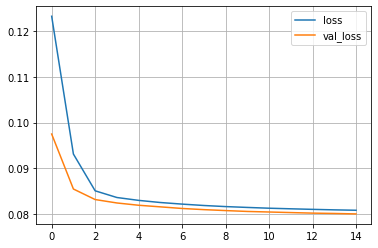

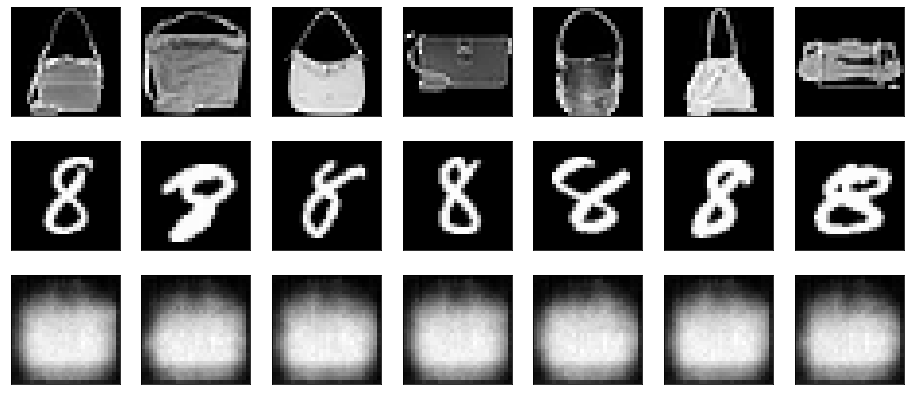

Средняя ошибка на Fashion Mnist: 0.1115
Минимальная ошибка на Fashion Mnist: 0.0346
Обьекты распознаны, как Fashion Mnist: 2.0%

Обучение для i = 9 

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0832 - val_loss: 0.0674
Epoch 2/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0648 - val_loss: 0.0604
Epoch 3/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0601 - val_loss: 0.0576
Epoch 4/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0580 - val_loss: 0.0561
Epoch 5/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0568 - val_loss: 0.0552
Epoch 6/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0561 - val_loss: 0.0546
Epoch 7/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0556 - val_loss: 0.0542
Epoch 8/15
125/125 [==============================] - 2s 16ms/step - loss: 0.0552 - val_loss: 0.0540
Epoch 9/15
125/125 [======================

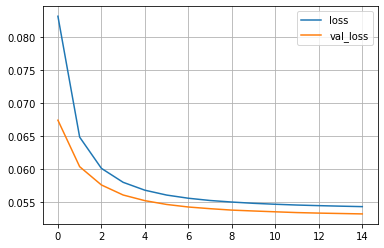

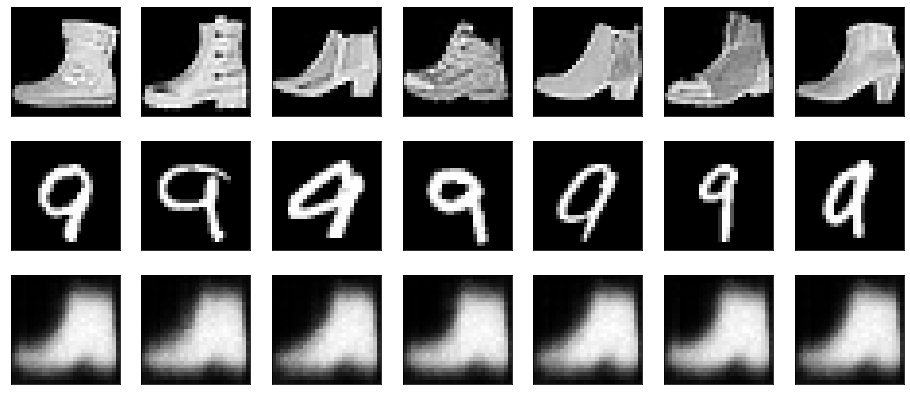

Средняя ошибка на Fashion Mnist: 0.1339
Минимальная ошибка на Fashion Mnist: 0.0184
Обьекты распознаны, как Fashion Mnist: 7.0%


In [ ]:
for i in range(10):
  print('\nОбучение для i =',i,'\n')

  X = x_mnist[arr_mnist[i]][:5000]
  Y = x_f_mnist[arr_f_mnist[i]][:5000]

  #Коллбэки
  early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0, restore_best_weights = True)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-06, verbose = 1)

  history = model_fM.fit(X[:4000], Y[:4000], epochs=15, 
                    validation_data = (X[4000:], Y[4000:]),
                    verbose = 1,
                    callbacks = [early_stopping, reduce_lr])
  
  #Выводим график точности распознавания на обучающей и проверочной выборках
  plt.plot(history.history["loss"], label='loss')
  plt.plot(history.history["val_loss"], label='val_loss')
  plt.legend()
  plt.grid()
  plt.show()

  predFase = model_fM.predict(X[4000:]) # сделаем предикт для 21 изображения
  predFase = predFase * 255 # представляем в виде значений от 0 до 255
  predFase = predFase.astype('uint8') # устанавливаем 8битовый тип

  #выведем оригинальные, и сгенерированные автокодировщиком
  plotImages(Y[4000:], X[4000:], predFase)

  # Возьмем среднеквадратичные ошибки и выведем их для лиц 
  errFase = [getMSE(x_f_mnist[i], predFase[i] / 255) for i in range(len(predFase))] # посчитаем ошибку для всех изображений
  #print("Ошибка на Лицах:", errFase[80:]) #посмотрим последнии 20
  print("Средняя ошибка на Fashion Mnist:", round(sum(errFase[80:]) / len(errFase[80:]), 4)) # посчитаем для последних 20 среднюю ошибку
  print("Минимальная ошибка на Fashion Mnist:", round(min(errFase),4)) #найдем минимальную ошибку

  bias = 0.05 # установим какое-то пороговое значение
  isFase = [e < bias for e in errFase[80:]] # запишем каждую ошибку больше порогового значения
  print("Обьекты распознаны, как Fashion Mnist: ", round(100*sum(isFase) / len(isFase)),"%", sep="")

## Cifar10

### Создание сети

In [ ]:
def baseAutoencoder_c10(shape=(28,28,1)): # зададим функцию создания базового автокодировщика
  img_input = Input((shape)) # задаём входные размеры
  k=4
  l=2

  e = Conv2D(32*k, (3, 3), activation='relu', padding='same')(img_input)
  e = Conv2D(64*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = Conv2D(128*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = Conv2D(256*k*l, (3, 3), activation='relu', padding='same', strides=2)(e)
  e = BatchNormalization()(e)

  d = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same', activation='relu')(e)
  d = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(d)
  d = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(d)

  model = Model(img_input, d)
  model.compile(optimizer=Adamax(lr=0.0001), loss='mse')

  return model # функция вернёт заданную модель

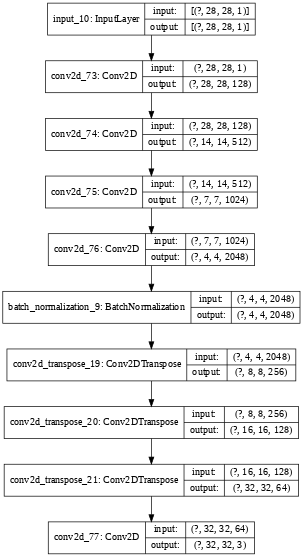

In [ ]:
model_c10 = baseAutoencoder_c10() # создаем автокодировщик
plot_model(model_c10, dpi=50, show_shapes=True, show_layer_names=True)

### Обучение сети

In [ ]:
for i in range(10):
  print('\nОбучение для i =',i,'\n')

  X = x_mnist[arr_mnist[i]][:5000]
  Y = x_cifar10[arr_cifar10[i]][:5000]

  #Коллбэки
  early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 0, restore_best_weights = True)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-06, verbose = 1)

  history = model_c10.fit(X, Y, epochs=15, 
                    validation_split = 0.2,
                    verbose = 1,
                    callbacks = [early_stopping, reduce_lr])
  


Обучение для i = 0 

Epoch 1/15
125/125 [==============================] - 4s 30ms/step - loss: 0.0623 - val_loss: 0.0658
Epoch 2/15
125/125 [==============================] - 4s 28ms/step - loss: 0.0612 - val_loss: 0.0640
Epoch 3/15
125/125 [==============================] - 4s 28ms/step - loss: 0.0611 - val_loss: 0.0626
Epoch 4/15
125/125 [==============================] - 4s 28ms/step - loss: 0.0611 - val_loss: 0.0614
Epoch 5/15
125/125 [==============================] - 4s 28ms/step - loss: 0.0610 - val_loss: 0.0603
Epoch 6/15
125/125 [==============================] - 4s 28ms/step - loss: 0.0610 - val_loss: 0.0602
Epoch 7/15
125/125 [==============================] - 4s 28ms/step - loss: 0.0610 - val_loss: 0.0601
Epoch 8/15
125/125 [==============================] - 4s 28ms/step - loss: 0.0610 - val_loss: 0.0601
Epoch 9/15
125/125 [==============================] - ETA: 0s - loss: 0.0609
Epoch 00009: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
125/125 [====

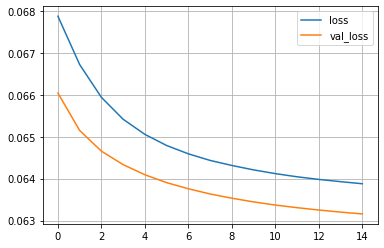

In [ ]:
  #Выводим график точности распознавания на обучающей и проверочной выборках
  plt.plot(history.history["loss"], label='loss')
  plt.plot(history.history["val_loss"], label='val_loss')
  plt.legend()
  plt.grid()
  plt.show()

ValueError: ignored

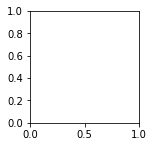

In [ ]:
  predFase = model_c10.predict(X[4000:]) # сделаем предикт для 21 изображения
  predFase = predFase * 255 # представляем в виде значений от 0 до 255
  predFase = predFase.astype('uint8') # устанавливаем 8битовый тип

  #выведем оригинальные, зашумленные и сгенерированные автокодировщиком
  plotImages(Y, X, predFase)

# Выводы
-----
1. К сожалению, мне не хватило знаний для отрисовки изображений. Так как расчеты качества обучения для Cifar10 показывают лучшее кечество6 чем на Fashion Mnisyt. И можно было бы учить дальше!
2. Работа с автокодировщиками хорошо тренирует пространственное мышление и работу с размерностями ))
3. Тема автокодировщиков очень интересна! Опять же жалко, что не хватает времени для того, чтобы разобраться в архитектуре сети - хотелось бы добиться лучшего качества
4. Много времени ушло на экспериментирование с архитектурой. Как всегда - чем проще данные, тем проще должна быть сеть. Это позволило упростить сетку, последовательно отключая слои. И ускорить ее работу. Также я перенес Conv2DTranspose в конец: сначала сжимал по одной оси, а потом стал сжимать по другой